**Estimating the price of a house**

This machine learning model estimates the price of a house (in thousands of $) based on four of its properties. The model is built using `linear regression`. The list of feature(s) and target(s) for the model are detailed below:

**Feature(s)**
- Square footage of the house (in units of 1000 sq.ft)
- Number of bedrooms
- Number of bathrooms
- Number of stories in the house

**Target(s)**
- Price of the house (units of million dollars)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math
from data_processing import DataProcessing

The `compute_cost` function calculates the cost value based on the following parameters:
- `x` :: List of all feature values (2D - vector of dimensions (m, n)).
- `y` :: List of all target values (1D - vector of dimensions (m,)).
- `w` :: Model parameter value (1D - vector of dimensions (n,)).
- `b` :: Model parameter value (scalar).

In [9]:
def compute_cost(x, y, w, b):
    y_hat = np.dot(x, w)
    y_hat = y_hat + b
    diff = np.square(y_hat - y)
    cost = np.mean(diff)
    cost = cost / 2
    return cost

The `compute_gradient` function  calculates the quantity by which the model parameters - w and b, must be reduced to minimize the value of the cost function. It returns  a tuple - `(dj_dw, dj_db)`, where 
- `dj_dw` :: quantity by which value of `w` must be decreased (1D - vector of dimensions (n,)).
- `dj_db` :: quanity by which value of `b` must be decreased (scalar).

In [10]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    y_hat = np.dot(x, w)
    y_hat = y_hat + b
    diff = y_hat - y
    dj_db = np.mean(diff)
    dj_dw = np.dot(x.T, diff)
    dj_dw = (1 / m) * dj_dw
    return dj_dw, dj_db

In [11]:
dp = DataProcessing("price", "area", "bedrooms", "bathrooms", "stories")
xi, yi = dp.normalize_features(), dp.normalize_targets()
(m, n) = xi.shape
alpha = 0.005
epoch = 10000
w = np.random.randn(n)
b = np.random.randn()
print(f"m = {m}")
print(f"n = {n}")
print(f"alpha = {alpha}")
print(f"Number of iterations = {epoch}")
print(f"w = {w}")
print(f"b = {b}")

m = 436
n = 4
alpha = 0.005
Number of iterations = 10000
w = [ 0.59749557 -0.32894651 -0.19393392 -1.52105169]
b = 0.3723662558375334


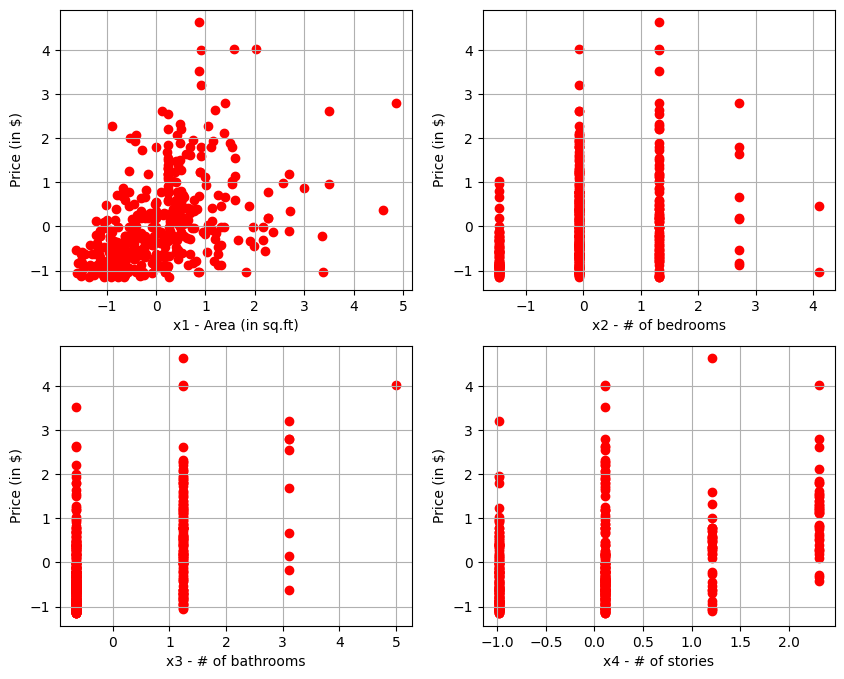

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axs[0, 0].scatter(xi[:,0], yi, c='r')
axs[0, 0].set_xlabel("x1 - Area (in sq.ft)")
axs[0, 0].set_ylabel("Price (in $)")
axs[0, 0].grid()

axs[0, 1].scatter(xi[:,1], yi, c='r')
axs[0, 1].set_xlabel("x2 - # of bedrooms")
axs[0, 1].set_ylabel("Price (in $)")
axs[0, 1].grid()

axs[1, 0].scatter(xi[:,2], yi, c='r')
axs[1, 0].set_xlabel("x3 - # of bathrooms")
axs[1, 0].set_ylabel("Price (in $)")
axs[1, 0].grid()

axs[1, 1].scatter(xi[:,3], yi, c='r')
axs[1, 1].set_xlabel("x4 - # of stories")
axs[1, 1].set_ylabel("Price (in $)")
axs[1, 1].grid()

In [13]:
epochs = np.empty(0, dtype='int')
costs = np.empty(0, dtype='float')
W_final = np.zeros(n, dtype='float')
b_final = float(0)
min_cost = float('inf')
for i in range(1, epoch + 1):
    dj_dw, dj_db = compute_gradient(xi, yi, w, b)
    w = w - (alpha * dj_dw)
    b = b - (alpha * dj_db)
    cost = compute_cost(xi, yi, w, b)
    epochs = np.append(epochs, i)
    costs = np.append(costs, cost)
    if i % (math.floor(epoch / 10)) == 0:
        print(f"Iteration {i} :: cost = {cost} :: w = {w} :: b = {b}")
    
    if cost < min_cost:
        min_cost = cost
        b_final = b
        W_final = np.copy(w)
print(f"Minimum cost = {min_cost} for w = {W_final} and b = {b_final}")

Iteration 1000 :: cost = 0.2615041560371105 :: w = [0.41279809 0.07964346 0.34101307 0.22449135] :: b = 0.0024777133661604282
Iteration 2000 :: cost = 0.2610581253775182 :: w = [0.4148705  0.05901931 0.33583717 0.25246752] :: b = 1.648662688593608e-05
Iteration 3000 :: cost = 0.26105750849036535 :: w = [0.4150614  0.05811297 0.33581241 0.25341732] :: b = 1.0970149742190776e-07
Iteration 4000 :: cost = 0.261057507512706 :: w = [0.4150684  0.05807353 0.33581825 0.25345174] :: b = 7.299504704873305e-10
Iteration 5000 :: cost = 0.26105750751100626 :: w = [0.41506863 0.05807179 0.33581874 0.25345303] :: b = 4.857223146704122e-12
Iteration 6000 :: cost = 0.2610575075110031 :: w = [0.41506863 0.05807172 0.33581878 0.25345308] :: b = 3.24746764386302e-14
Iteration 7000 :: cost = 0.2610575075110031 :: w = [0.41506863 0.05807171 0.33581878 0.25345308] :: b = 3.708563266290192e-16
Iteration 8000 :: cost = 0.2610575075110031 :: w = [0.41506863 0.05807171 0.33581878 0.25345308] :: b = 1.66167868804

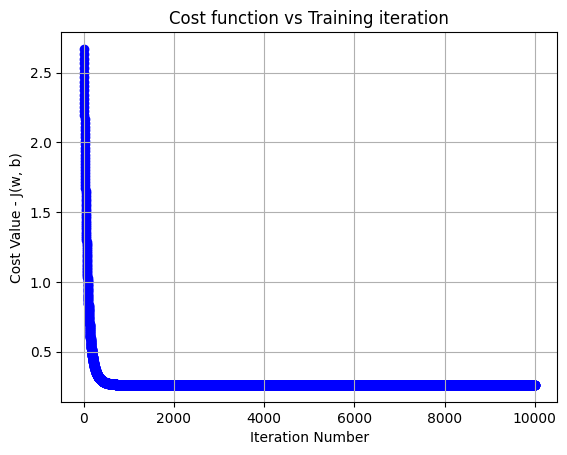

In [14]:
fig, ax = plt.subplots()
ax.set_title("Cost function vs Training iteration")
ax.scatter(epochs, costs, c='b')
ax.set_ylabel("Cost Value - J(w, b)")
ax.set_xlabel("Iteration Number")
ax.grid()